## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis

In [2]:
# Data Collection

df = pd.read_csv('titanic_train.csv')

In [3]:
# first five rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check the size (Row x Columns) of dataset

df.shape

(891, 12)

In [6]:
# Check Data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Statistical details about dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Check missing values in dataset

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop cabin coloumn as many values are missing

df.drop('Cabin',inplace= True, axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [10]:
# imputing missing values in age and embarked coloumns

df['Age'].fillna(df['Age'].mean(), inplace= True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S', inplace= True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
# Sex Column to dummies numerical values

gender=pd.get_dummies(df['Sex'],drop_first=True) 

In [17]:
df['Gender'] = gender
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,S,0
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,S,1
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,S,1
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,S,1
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,0


## Data Analysis

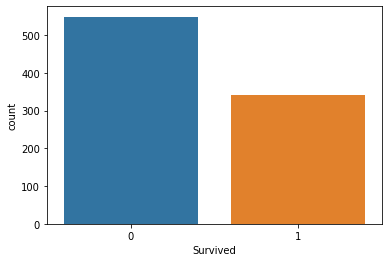

In [18]:
sns.countplot(x='Survived', data= df)

Those who did not survived (more than 500) are greater than who survived (approx 300)

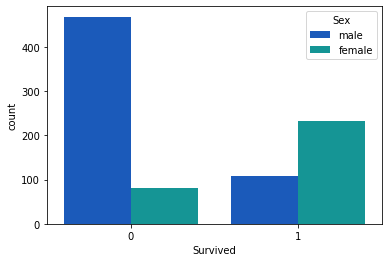

In [19]:
sns.countplot(x='Survived', data=df, hue='Sex', palette='winter')

0 represents not survived and 1 represents survives

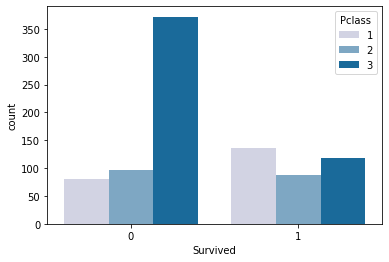

In [21]:
sns.countplot(x='Survived', data=df, hue='Pclass', palette='PuBu')

The passangers who did not survived belongs to 3rd class. 1st class passangers are more likely to survive.

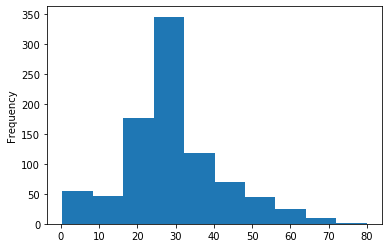

In [22]:
df['Age'].plot.hist()

Travelling, young people (age group between 20 to 40) are more compare to people whose age group lies between 70 to 80

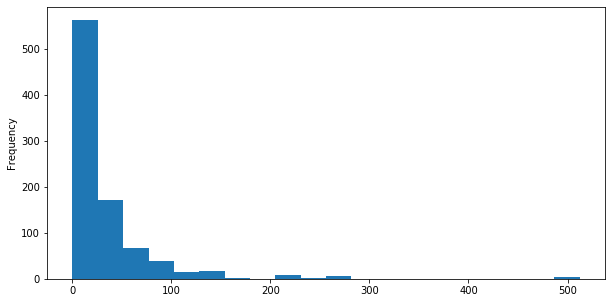

In [24]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

Most of tickets brought are under fare 100 and few are on higher side of fare (i.e. 220-500)

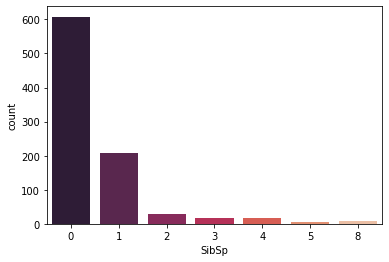

In [25]:
sns.countplot(x='SibSp', data=df, palette='rocket')

Most of passangers do not have their siblings

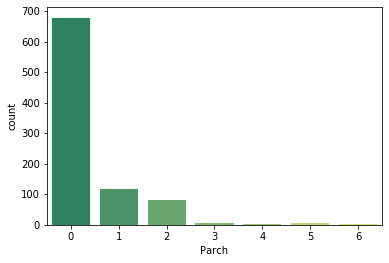

In [26]:
sns.countplot(x='Parch', data=df, palette='summer')

No. of parents and siblings are less

## Preparing data for model building

In [27]:
df['family'] = df['SibSp'] + df['Parch']

In [28]:
# Seperating Features and Labels

x = df[['Pclass','Age','family','Fare','Gender']]  
y = df['Survived']

## Data Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
SD=scaler.transform(x)

In [31]:
print(SD)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]


In [33]:
x = SD
y = df['Survived']
print(x)
print(y)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Train Test Split

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(891, 5) (712, 5) (179, 5)


## Logistic Regression (Training the model)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Logistic Regression (Model Evaluation)

In [37]:
#accuracy score of the training data

x_train_prediction = lr.predict(x_train)
training_data_accuracy= accuracy_score(x_train_prediction, y_train)

In [38]:
print("Accuracy score of the training data is ", training_data_accuracy)

Accuracy score of the training data is  0.8019662921348315


In [39]:
# accuracy score 0f the test data

x_test_prediction = lr.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction,y_test)

print("Accuracy score of the test data is ", test_data_accuracy)

Accuracy score of the test data is  0.8044692737430168


we have the accuracy of Logistic Regression model is 80% 

In [41]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, x_test_prediction)

array([[92, 13],
       [22, 52]], dtype=int64)

In [43]:
# Cross validation

from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.7923670830456343


In [44]:
# Saving the model

import joblib
joblib.dump(lr, "Titanic.pkl")

['Titanic.pkl']